In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
data = pd.read_csv('spam.csv', encoding='latin-1')

In [63]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [64]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [65]:
data.drop(data[['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']], axis=1, inplace=True)

In [66]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [67]:
data.isna().sum()

v1    0
v2    0
dtype: int64

In [68]:
data.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [69]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [70]:
data.target = encoder.fit_transform(data.target)

In [71]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [72]:
data.duplicated().sum()

403

In [73]:
data = data.drop_duplicates(keep='first')

In [74]:
#EDA

In [75]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

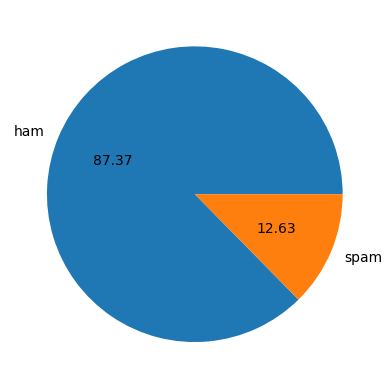

In [76]:
plt.pie(data['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [77]:
#Data is imbalanced

In [78]:
import nltk

In [79]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/divyambansal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [80]:
data['num_chars']=data['text'].apply(len)

/var/folders/fn/qzkx51nn66bfy072yjlc8x_00000gn/T/ipykernel_73744/289916169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_chars']=data['text'].apply(len)


In [81]:
#Number of words

In [82]:
data['num_words']=data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

/var/folders/fn/qzkx51nn66bfy072yjlc8x_00000gn/T/ipykernel_73744/3449660257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_words']=data['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [83]:
data['num_sentences'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

/var/folders/fn/qzkx51nn66bfy072yjlc8x_00000gn/T/ipykernel_73744/1525970279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_sentences'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [84]:
data[['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [85]:
data[data['target']==0][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [86]:
data[data['target']==1][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_chars', ylabel='Count'>

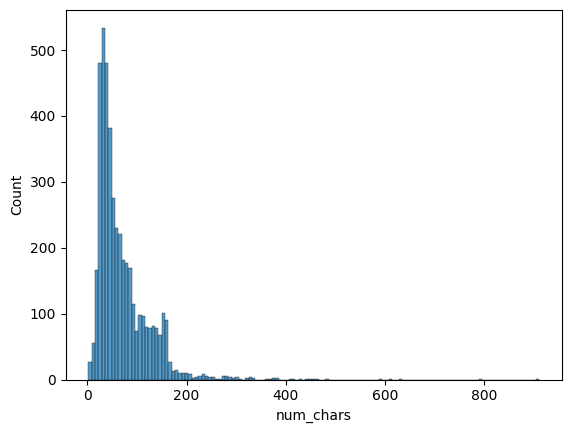

In [87]:
sns.histplot(data[data['target']==0]['num_chars'])

<Axes: xlabel='num_chars', ylabel='Count'>

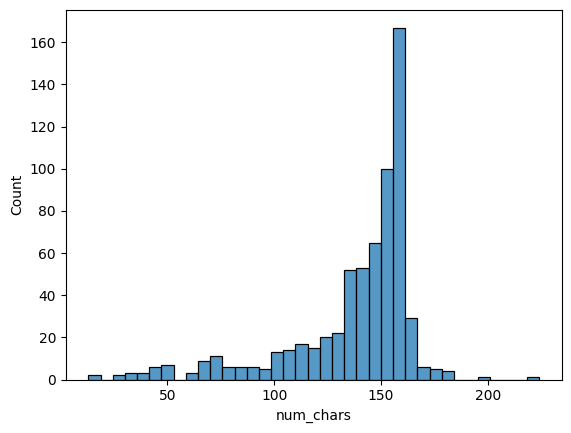

In [88]:
sns.histplot(data[data['target']==1]['num_chars'])

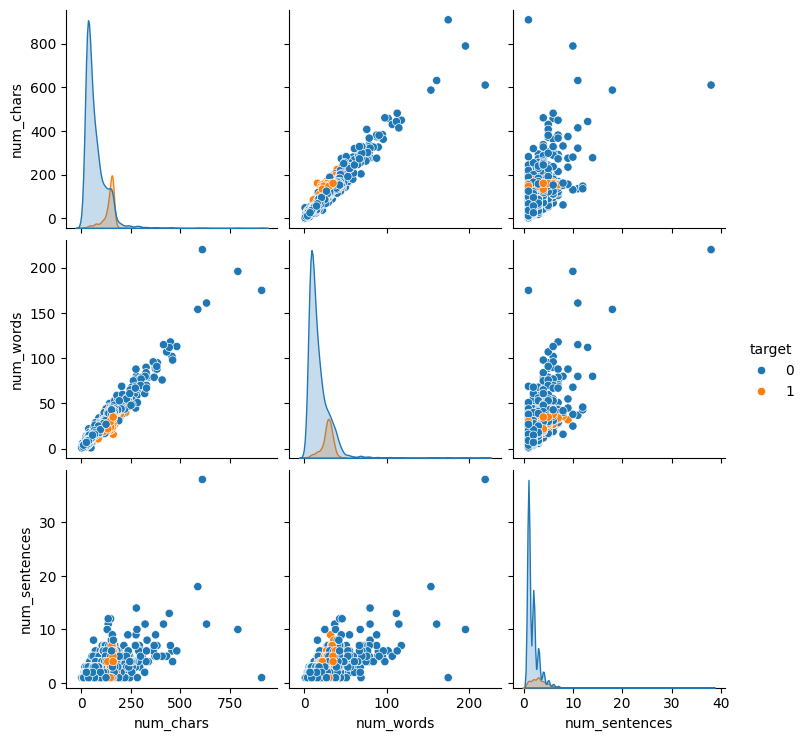

In [89]:
sns.pairplot(data, hue='target')

In [90]:
data

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [91]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [92]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [93]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [104]:
#Data preprocessing
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    # Filter out non-alphanumeric tokens
    y = [i for i in text if i.isalnum()]
    
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    punctuations = set(string.punctuation)
    filtered = [word for word in y if word not in stop_words and word not in punctuations]
    
    # Initialize the stemmer
    ps = PorterStemmer()
    
    # Stem the words
    stemmed = [ps.stem(word) for word in filtered]

    # Return the processed text
    return " ".join(stemmed)

In [106]:
data['transformed_text'] = data['text'].apply(transform_text)

/var/folders/fn/qzkx51nn66bfy072yjlc8x_00000gn/T/ipykernel_73744/2902741962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transformed_text'] = data['text'].apply(transform_text)


In [116]:
data

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [111]:
from wordcloud import WordCloud


In [122]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [124]:
spam_wc = wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=" "))

In [126]:
ham_wc = wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=" "))

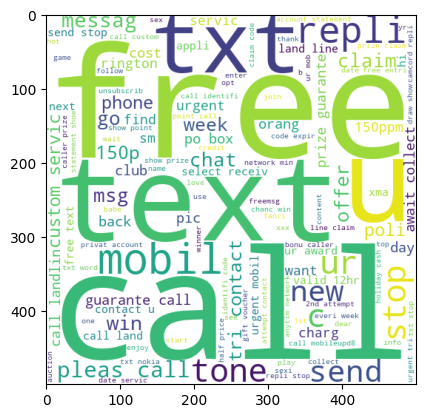

In [125]:
plt.imshow(spam_wc)

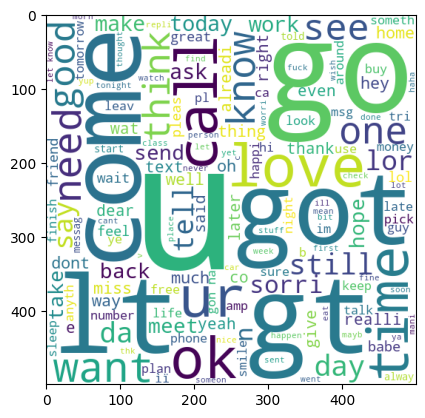

In [127]:
plt.imshow(ham_wc)

In [131]:
spam_corpus = []
for msg in data[data['target']==1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)

<Axes: xlabel='Word', ylabel='Freq'>

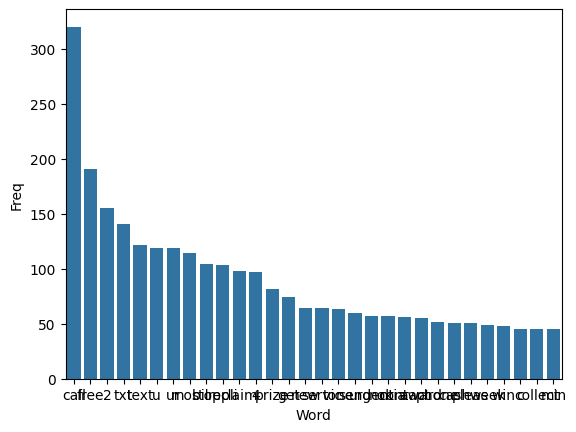

In [134]:
from collections import Counter
df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Freq'])
sns.barplot(x='Word', y='Freq',data=df)

In [135]:
ham_corpus = []
for msg in data[data['target']==0]['transformed_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)

In [137]:
len(ham_corpus)

35404

<Axes: xlabel='Word', ylabel='Freq'>

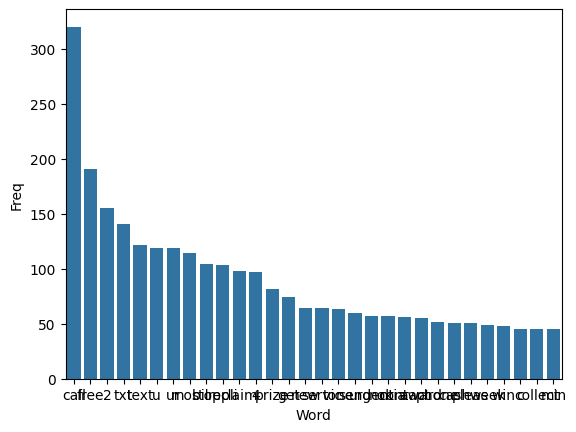

In [136]:
df1 = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Freq'])
sns.barplot(x='Word', y='Freq',data=df)

In [139]:
#We will use naive bayes model for training the data
#Naive bayes performs very well on the textual data.

In [160]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [161]:
X = tfidf.fit_transform(data['transformed_text']).toarray()


In [162]:
X.shape

(5169, 6708)

In [163]:
y = data['target'].values

In [164]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=308)

In [167]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [168]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [169]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))


0.8713733075435203
[[794 116]
 [ 17 107]]
0.4798206278026906


In [170]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))


0.960348162475822
[[909   1]
 [ 40  84]]
0.9882352941176471


In [171]:
bnb.fit(X_train, y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))


0.8713733075435203
[[794 116]
 [ 17 107]]
0.4798206278026906


In [172]:
# MultinomialNB is working the best with TFIDF